In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Create data
X, y = make_classification(random_state=1, n_features=50, n_informative=5, n_redundant=0)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
y_pred= clf.predict(X_test_scaled)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8


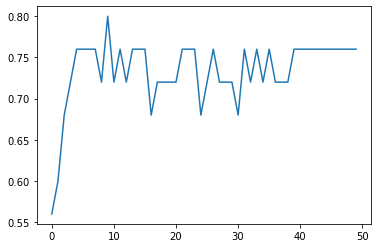

score: 0.76


In [12]:
clfs = []
scores = []
for i in range(50):
    
    # Sample the data for each new tree
    X_train_scaled_bootstrap, y_train_bootstrap = resample(X_train_scaled, y_train, random_state=i)
    
    # Create a random decision tree and append it to our list of classifiers
    clf = DecisionTreeClassifier(splitter='random', random_state=i+200).fit(X_train_scaled_bootstrap, y_train_bootstrap)
    clfs.append(clf)
    
    # Take the median score of all the created classifiers
    y_preds = [clf.predict(X_test_scaled) for clf in clfs]
    y_pred = pd.DataFrame(y_preds).median().round()
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

plt.plot(scores)
plt.show()
print(f'score: {score}')

In [14]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2)).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.84
